# **SARP-East Coding Lesson 4 - Raster & Gridded Data**
## *Introduction to Xarray*
08 July 2024
<br>Riley McCue

This lesson is based off of one on the [SARP Programming website](https://nasa-sarp.github.io/sarp_lessons/index.html).

##  🛰️❓👩🏽‍🔬 *The scientist is not a person who gives the right ansers, they're one who asks the right questions.* 👩🏽‍🔬❓🛰️
<br>- Claude Levi Strauss, French Anthropolgist 

:::{admonition} 🧠 Recap
:class: tip
1. What sort of data did we work with in pandas? Describe the data.
2. What two methods did we use to index our rows? Describe the difference between them.
3. Write down one question you still have about last weeks lessons.

:::{admonition} 📔 Tips going into this week
:class: hint
1. Warning -- Chance for bigger learning curve!! Hold patience for yourself. 

We are learning how to work with gridded data in the xarray library in Python the next two days. This may have a bigger learning curve for those of you who have never worked with this type of data. Compared to working in pandas with tabular data -- which you all likely had a concept of tabular data prior -- this week may bring a bigger obstacle of understanding the data before you can begin to understand the syntax of working with it in Python, and even more specifically the library xarray.

2. Dedicate an amount of *time* rather than pushing to reach certain goal points each day (especially for beginners).

This stuff is complex, and dedicating time to sit and play with it is apart of the learning process. Just getting yourself in the notebook is the most important part, and if you are feeling intimidated by things, take the pressure to hit a stopping point off -- you are learning whether you reach a goal or not. I know my office hours are still a bit limited this week, but I am still available to you all! Reach out and we can figure something out:) (Next week and the following, I will have LOTS and LOTS of office hours for you all!!!)

# What is Raster Data?
![Raster Anatomy](./Data_Images/raster_anatomy.jpg)

### 💭 Why are we interested in raster data?
As earth science researchers, we are interested in raster data because this is a very very very common data type in the field. Most satellite and airborne imagery is a type of raster data, so being able to understand and work with this data is a very important skill.

## 🧱 Before we can get to xarray, Let's Understand `numpy`

The library we will be focusing on is `xarray`, but a building block of `xarray` is `numpy`. 

For those of you who have worked with any sort of array in Python before, you may have very well used this numpy library. 

`numpy` arrays have some similarities to the lists, but they differ in a few ways:

1. `numpy` arrays usually contain values that are all of the same type
2. `numpy` arrays can have multiple dimensions
3. `numpy` arrays are highly optimized for performance

In [1]:
#Let's import the library and nickname it.
import numpy as np

In [2]:
# Creates an array from a list of lists.
a_my_first = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
a_my_first

array([[ 1,  2,  3],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

We created our first array -- WOOHOO!
The general syntax for so is:
```
a_name = np.array(data)
```
We can check the dimensions of our array with `.shape`. Dimensions are an *attribute*  of an array.

In [3]:
a_my_first.shape

(4, 3)

Our array has 4 rows and 3 columns. Note, when viewing dimensions, rows are first and columns are second.

We haven't really seen this syntax here yet with `.shape` -- notice it is `.shape` and not `.shape()`. This is because `.shape` is an *attribute*, not a method, of the numpy library. This has to do with how the authors chose to write it, and it is just one of those things you need to know about the libray you are using. 

#### 🔢Indexing a `numpy` Array
The syntax for indexing an array is very similar to indexing lists, except we have multiple indices now that we have multiple dimensions.

In [4]:
#Let's find the value in the first row at the second column
a_my_first[0, 1]

2

In [5]:
#Let's find the value of the second row in the first column
a_my_first[1,0]

3

Note that `a_my_first[0, 1]` and `a_my_first[1, 0]` do no return the same result because index goes in row, column order.

We can also choose to index by just 1 of the 2 dimensions. This will return an array.

In [6]:
#let's view the second row
a_my_first[1]

array([3, 4, 5])

In [7]:
#Now let's take the first two rows, and the third column
a_my_first[0:2,2]

array([3, 5])

Recall that the ending index is not included.

In [8]:
#Let's view the second column
a_my_first[:,1]

array([ 2,  4,  7, 10])

Notice the syntax used in the row position. We use `:` in place of the row index to indicate "all rows".

In [9]:
#Let's view the third row of the second and third columns
a_my_first[2,1:3]

array([7, 8])

:::{admonition} **1** Check your understanding
:class: tip
Consider the following array called `a_pressure`.
```
a_pressure = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]])
```
1. Write a line of code to output how many dimensions the array has.
2. How many dimensions will the output of `a_pressure[1]` have?
:::

In [10]:
#The array
a_pressure = np.array([[[1,2],[3,4]],[[5,6],[7,8]],[[9,10],[11,12]]])

In [11]:
# 1

In [12]:
# 2

`numpy` is a great tool for dealing with data in multiple dimensions. However, It can get to be cumbersome to keep track of indexes once you have 2, 3, 4+ dimensions. To help us with this part, we switch to `xarray`.

# Now to the Star of the Show...⭐⭐ `xarray` ⭐⭐

Today we are getting to our core raster library - `xarray`.  `xarray` is built on top of `numpy`. `xarray` provides labels around `numpy` data arrays. `xarray` takes the `numpy` arrays and makes them easier to work with by adding labels to the axes. This is a small change but it has a huge effect on the ease of working with data.

`xarray` is a great library for working with gridded datasets. It has many built in analysis methods, nice visualization defaults, and it was built by the scientific community. 

You can do so much with `xarray`, there is actually an entire website of lessons and practice for working with it!
* [xarray.dev](https://tutorial.xarray.dev/overview/get-started.html)

Some other good resources as well:
* [UW Geohackweek](https://geohackweek.github.io/nDarrays/)
* [Oceanhackweek/Scipy 2020](https://xarray-contrib.github.io/xarray-tutorial/)

## 🧱 Gridded data and `xarray`

### 🏗️`xarray` Data Structures

What `xarray` does well is labelled, multi-dimensional data. What does that mean? There are two parts:
1. **multi-dimensional** - the data is in a grid and can have any number of dimensions. Ex. latitude, longitude, and altitude (3 dimensions). This is often represented as a cube of data
2. **labelled** - the cube of data isn't just any old cube - each dimension has associated values. For example, the exact latitudes or longitudes that the cube is representing.

![Xarray data structure](https://www.researchgate.net/publication/315950787/figure/fig3/AS:567797237248005@1512384818972/An-example-of-how-a-dataset-netCDF-or-xarray-for-a-weather-forecast-might-be.png)

_Image from [Hoyer & Hamman 2017](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.148/)_

# 🛑🛑🛑 **ACTIVITY** 🛑🛑🛑
Let's visualize what this data structure is doing with some paper.

## 🏗️ Core Data Structure: `DataArray`
`xarray` provides us with two new datastructures: `DataArray` and `Dataset`

The first core `xarray` data structure is a `DataArray`, which represents some labelled data. We are going to create some fake data that will represent sea surface temperature (SST) off the coast of the Iberian Penninsula/Morocco. The image below shows the pieces that go into this:
* values for temperature
* we need to know that our data is arranged by `latitude` and `longitude` 
* values for latitude and longitude

![SST DataArray](./Data_Images/sst_dataarray.png)

First, we need to create a `numpy` array of this sea surface temperature data.

In [13]:
import numpy as np

In [14]:
a_sst = np.random.randint(13, high=20, size=(5, 6))
# Data values
a_sst

array([[18, 16, 18, 14, 16, 19],
       [15, 13, 17, 18, 14, 14],
       [14, 13, 16, 13, 14, 16],
       [16, 13, 14, 18, 17, 14],
       [19, 14, 18, 13, 14, 17]])

Next let's define where our data is in space - Latitude and Longitude.

In [15]:
# Coordinate values
y = [36, 37, 38, 39, 40]
x = [-22, -21, -20, -19, -18, -17]

Notice how the y values increase from bottom to top. While the array values are indexed top to bottom, plotted values are indexed bottom to top, with the origin typically being in the bottom left. 

Finally, create an array!

In [16]:
import xarray as xr

In [17]:
a_sst = xr.DataArray(data=a_sst, dims=['latitude', 'longitude'], coords=[y, x],)
a_sst

<xarray.DataArray (latitude: 5, longitude: 6)> Size: 240B
array([[18, 16, 18, 14, 16, 19],
       [15, 13, 17, 18, 14, 14],
       [14, 13, 16, 13, 14, 16],
       [16, 13, 14, 18, 17, 14],
       [19, 14, 18, 13, 14, 17]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17

Let's examine our input. 
<br>The general syntax for creating an array is:
```
array_name = xr.DataArray(data = data_name, dims = ['dim1', 'dim2', ...], coords = [ coord1, coord2, ...]
```
The 3 arguments to the `DataArray` object, each of which correspond to the 3 items we listed at the beginning of this section:
* `data` - values for temperature 
* `dim1` and `dim2` - indicates that our data is arranged by `latitude` and `longitude` 
* `coord1` and `coord2` - the values for latitude and longitude

Each of these -- `data`, `dims`, and `coords` is an **attribute** (or property) of the object. To access these attributes, similar to how we did earlier for the `.shape` of numpy arrays.

In reference to the English langauage analogy: objects are the nouns, functions are the verbs, and *attributes are the adjectives*!

:::{admonition} Coding Vocabulary
:class: warning
**Attribute:**  Information attached to a data structure that describes it.
<br> *Syntax* - `array_name.attribute_name`
:::

In [18]:
#Let's print out some attributes!
print(a_sst.dims)
print(a_sst.coords)
print(a_sst.data)

('latitude', 'longitude')
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17
[[18 16 18 14 16 19]
 [15 13 17 18 14 14]
 [14 13 16 13 14 16]
 [16 13 14 18 17 14]
 [19 14 18 13 14 17]]


Let's view our array again and examine our output.

In [19]:
# View our dataarray
a_sst

<xarray.DataArray (latitude: 5, longitude: 6)> Size: 240B
array([[18, 16, 18, 14, 16, 19],
       [15, 13, 17, 18, 14, 14],
       [14, 13, 16, 13, 14, 16],
       [16, 13, 14, 18, 17, 14],
       [19, 14, 18, 13, 14, 17]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17

When we create an array we get back a cool interactive output that lets us explore the object.

We are outputed:
* the array
* dimensions
* coordinates
* indexes
* attributes
<br>Each stack of coins icon and paper icon can be clicked and expanded to give more information. We will go into what all of these outputs are throughout this lesson.

An array contains data on only one variable.

## 🧭`dims` vs. `coords`

Although they are not the same thing, if this is your first time learning about `xarray` you can think of them as the same thing for now.

To clarify the difference:
* `dims` stands for dimensions of our array. `dims` are the labels.
* `coords` stands for coordinates. These contain the actual data values for our columns and rows.

In the practice we will look at some examples that will help us get a more intuitive sense for how dimensions and coordinates are different.
One thing that can also be helpful is to omit the `dims` or `coords` argurment from array creation to see how the output changes. Neither argument is required, so feel free to try that on your own.

## 🤩 3D Array

The process we just went through can be repeated for arrays of increasing size.  Here is what a 3D DataArray would look like.

In [20]:
import numpy as np
import xarray as xr
# Define the data
a_temp_3d_values = np.random.randint(0, high=75, size=(3, 5, 6))

# Define the coordinates
depth = [0, 500, 1000]
lats = [36, 37, 38, 39, 40]
lons = [-22, -21, -20, -19, -18, -17]

# Create the array
a_temp_3d = xr.DataArray(a_temp_3d_values, 
                      dims=['depth', 'latitude', 'longitude'], 
                      coords=[depth, lats, lons]
                     )
print(a_temp_3d_values)
a_temp_3d

[[[ 7 40 39  0 19  7]
  [60 18 10 46  8 26]
  [27 21 34  9 67 55]
  [68 32 74 57 69 37]
  [29 11 73 69 35 67]]

 [[33 58 45 18 62 31]
  [ 5 45  9 31 67 69]
  [53 45 30  8 23 51]
  [58 55  1 25 27 42]
  [41  7 45 24 53 67]]

 [[63 50 48  6  6 16]
  [63 65 17  6 51 21]
  [20 30 61 29  6 56]
  [38 36 59 25 37 70]
  [25 67 35 59 71  1]]]


<xarray.DataArray (depth: 3, latitude: 5, longitude: 6)> Size: 720B
array([[[ 7, 40, 39,  0, 19,  7],
        [60, 18, 10, 46,  8, 26],
        [27, 21, 34,  9, 67, 55],
        [68, 32, 74, 57, 69, 37],
        [29, 11, 73, 69, 35, 67]],

       [[33, 58, 45, 18, 62, 31],
        [ 5, 45,  9, 31, 67, 69],
        [53, 45, 30,  8, 23, 51],
        [58, 55,  1, 25, 27, 42],
        [41,  7, 45, 24, 53, 67]],

       [[63, 50, 48,  6,  6, 16],
        [63, 65, 17,  6, 51, 21],
        [20, 30, 61, 29,  6, 56],
        [38, 36, 59, 25, 37, 70],
        [25, 67, 35, 59, 71,  1]]])
Coordinates:
  * depth      (depth) int64 24B 0 500 1000
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17

:::{admonition} **2** Check your understanding
:class: tip

The `DataArray` below contains values for wind speeds.
1. What are the dimensions?
2. What are the coordinates?
3. What is the highest and lowest wind speed in the array?

In [21]:
a_wind_speed = [[8, 12,7 ], [40, 42, 37], [71, 71, 80,], [106, 98, 111],]
pressure = [1000, 750, 500, 350]
lons = [-80, -79, -78]
a_wind = xr.DataArray(a_wind_speed, dims=['pressure', 'longitude'], coords=[pressure, lons])
a_wind

<xarray.DataArray (pressure: 4, longitude: 3)> Size: 96B
array([[  8,  12,   7],
       [ 40,  42,  37],
       [ 71,  71,  80],
       [106,  98, 111]])
Coordinates:
  * pressure   (pressure) int64 32B 1000 750 500 350
  * longitude  (longitude) int64 24B -80 -79 -78

In [22]:
# 1 Dimensions


In [23]:
# 2 Coordinates


In [24]:
# 3 Max wind speed

# 3 Min wind speed


## 🔡 Indexing and Selecting Values and Data by Label

One of the great things about having labelled data is that it gives us several ways to select data.

When we talked about selecting data in lists we talked about a data **index**. `xarray` also lets you select data by index, but the syntax is different. 

In pandas we used `.iloc[]` and `.loc[]` to index. Similarily, in `xarray`, we use
* `.isel()` to select integer value indices
* `.sel()` to select data labeled indices

Instead of `[]` we use the `()` method and we give the names of our dimensions as arguments.

In [25]:
# Let's view our sea surface temperature data from before
a_sst

<xarray.DataArray (latitude: 5, longitude: 6)> Size: 240B
array([[18, 16, 18, 14, 16, 19],
       [15, 13, 17, 18, 14, 14],
       [14, 13, 16, 13, 14, 16],
       [16, 13, 14, 18, 17, 14],
       [19, 14, 18, 13, 14, 17]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17

We are going to examine `.isel()` first.

In [26]:
# Get the value at latitude index 0 and longitude index 3
a_sst.isel(latitude=0, longitude=3)

<xarray.DataArray ()> Size: 8B
array(14)
Coordinates:
    latitude   int64 8B 36
    longitude  int64 8B -19

The return value from indexing is always another `DataArray`. This is true even if the return has just 1 value in it. 

At any point you are working with a `DataArray` you can get the `numpy` array of the data values using `.values` or `.data`.

In [27]:
# View the numpy array of this dataarray
a_sst.isel(latitude=0, longitude=3).data

array(14)

One great thing to notice about this approach is that we didn't have to keep track of whether latitude or longitude was the first dimension in the array. We gave `latitude` and `longitude` as arguments and `xarray` knew how to to use that information.

Notice how we can switch the arguments and get the same result.

In [28]:
#Since we specify which dimension we are viewing, order doesn't matter.
a_sst.isel(longitude=3, latitude=0).data

array(14)

Like in `numpy`, we don't have to select using all of the dimensions of the dataset.

In [29]:
#We can also view just one dimension if we want. Notice what is different about the output.
a_sst.isel(longitude=3)

<xarray.DataArray (latitude: 5)> Size: 40B
array([14, 18, 13, 18, 13])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
    longitude  int64 8B -19

:::{admonition} **3** Check your understanding
:class: tip

What is the shape of the output DataArray in each of the 

1 - `a_sst.isel(latitude=0, longitude=2)`

2 - `a_sst.isel(latitude=0)`


a) 1 - (latitude: 1, longitude: 1), 2 - (latitude: 1, longitude: 1)

b) 1 - (latitude: 5, longitude: 6), 2 - (latitude: 5, longitude: 6)

c) 1 - (latitude: 1, longitude: 1), 2 - (latitude: 1, longitude: 6)

d) 1 - (latitude: 5, longitude: 1), 2 - (latitude: 5, longitude: 1)

e) 1 - (latitude: 1, longitude: 6), 2 - (latitude: 5, longitude: 6)

:::

Now, let's examine `.sel()` and see how similar it is. 

In [30]:
# Get the value of the array where latitude is EQUAL TO 37 and longitude is EQUAL TO -19
a_sst.sel(latitude=37, longitude=-19)

<xarray.DataArray ()> Size: 8B
array(18)
Coordinates:
    latitude   int64 8B 37
    longitude  int64 8B -19

To select a range of values, we use `slice()`.

In [31]:
#Use slice to get the range of data only at 37 and 38 latitude.
a_sst.sel(latitude=slice(37, 39))

<xarray.DataArray (latitude: 3, longitude: 6)> Size: 144B
array([[15, 13, 17, 18, 14, 14],
       [14, 13, 16, 13, 14, 16],
       [16, 13, 14, 18, 17, 14]])
Coordinates:
  * latitude   (latitude) int64 24B 37 38 39
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17

### 🧱 `numpy`-like selection syntax

If you want to use some `numpy` syntax still, xarray will take it. However, this doesn't take advantage of the full power of `xarray`, but its's good to know.

In [32]:
#Using numpy syntax on an xarray DataArray
#Yields same output as a_sst.isel(latitude = 0, longitude = 3)
a_sst[0, 3]

<xarray.DataArray ()> Size: 8B
array(14)
Coordinates:
    latitude   int64 8B 36
    longitude  int64 8B -19

In [33]:
# Even though we are using numpy syntax, we are still outputted a data array above.
#If we want to view the numpy array associated, we can still use the .data attribute.
a_sst[0, 3].data

array(14)

:::{admonition} **4** Check your understanding
:class: tip
What would be the output sst values of the following lines of code?
1. `a_sst.isel(latitude=2, longitude=1)`
2. `a_sst.sel(latitude=38, longitude=-21)`
3. `a_sst.isel(latitude=2).sel(longitude=-21)`

In [34]:
# 1


In [35]:
# 2


In [36]:
# 3


## 🏗️ Core Data Structure= `Dataset`

The other core data structure in `xarray` is a `Dataset`, which is a group of `DataArray`s.

Similar to how a `DataFrame` in pandas was a compilation of `Series`, a `Dataset` in xarray is a compilation of `DataArray`s.

To look at a `Dataset` let's go back to our example off the Iberian Penninsula. Let's say that in addition to sea surface temperature we also have data for chlorophyll-a.

In [37]:
# Create DataArray for chlorophyll-a
a_chlor_values = np.random.uniform(0.18, high=0.28, size=(5, 6))
a_chlor_values

array([[0.25030116, 0.21200825, 0.244879  , 0.22357125, 0.21923147,
        0.25087829],
       [0.27545905, 0.19029809, 0.25056769, 0.19852434, 0.25374788,
        0.26510447],
       [0.21293547, 0.2700516 , 0.18354397, 0.27320827, 0.25484768,
        0.26534002],
       [0.21525424, 0.19899882, 0.21756319, 0.1947652 , 0.27737807,
        0.23811009],
       [0.20407507, 0.23031795, 0.22630726, 0.19320515, 0.22794802,
        0.19465391]])

In [38]:
ds_ocean = xr.Dataset(
    data_vars={"temperature": a_sst, "chlorophyll-a": (("latitude", "longitude"), a_chlor_values)}
)

ds_ocean

<xarray.Dataset> Size: 568B
Dimensions:        (latitude: 5, longitude: 6)
Coordinates:
  * latitude       (latitude) int64 40B 36 37 38 39 40
  * longitude      (longitude) int64 48B -22 -21 -20 -19 -18 -17
Data variables:
    temperature    (latitude, longitude) int64 240B 18 16 18 14 ... 18 13 14 17
    chlorophyll-a  (latitude, longitude) float64 240B 0.2503 0.212 ... 0.1947

In the output we see that we have a new section: Data Variables where both temperature and chlorophyll-a are listed! The coordinates and dimensions are also maintained.

I'm not explaining in detail the line where I created the Dataset because in real life you likely won't be creating your own datasets. Instead you'll be reading in data that someone else collected. Therefore, at this point, the most important thing to be comfortable with is being able to look at the output of a created Dataset and understand what it contains.

To view `DataArray`s in a `Dataset`, you can use the following syntax:
```
dataset_name['variable_name']
```
OR
```
dataset_name.variable_name
```

In [39]:
# Views temperature dataarray
ds_ocean['temperature']

<xarray.DataArray 'temperature' (latitude: 5, longitude: 6)> Size: 240B
array([[18, 16, 18, 14, 16, 19],
       [15, 13, 17, 18, 14, 14],
       [14, 13, 16, 13, 14, 16],
       [16, 13, 14, 18, 17, 14],
       [19, 14, 18, 13, 14, 17]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17

In [40]:
#Also views temperature dataarray
ds_ocean.temperature

<xarray.DataArray 'temperature' (latitude: 5, longitude: 6)> Size: 240B
array([[18, 16, 18, 14, 16, 19],
       [15, 13, 17, 18, 14, 14],
       [14, 13, 16, 13, 14, 16],
       [16, 13, 14, 18, 17, 14],
       [19, 14, 18, 13, 14, 17]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -22 -21 -20 -19 -18 -17

## 🌏 Let's do it with Real Data !!!

The small dataset we made manually in the first part of this notebook is quite useful for learning, but we will not be making out own data. We are scientific researchers, and will be analyzing real data that we download. 

We are going to revisit sea surface temperature, but this time with real data from [NOAA OISST](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html) !!!

To open this up, I am going to take you all to [github](https://github.com/NASA-SARP/sarp_lessons/blob/main/lessons/gridded_data/data/oisst-avhrr-v02r01.20220304.nc)

Once you have the file downloaded into Cyrocloud, and you have your relative file path, use the command to open a datasets
```
xr.open_dataset()
```

In [41]:
ds_sst = xr.open_dataset('./Data_Images/oisst-avhrr-v02r01.20220304.nc')
ds_sst

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * zlev     (zlev) float32 4B 0.0
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, zlev, lat, lon) float32 4MB ...
    anom     (time, zlev, lat, lon) float32 4MB ...
    err      (time, zlev, lat, lon) float32 4MB ...
    ice      (time, zlev, lat, lon) float32 4MB ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20220304.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2022-03-04T00:00:00Z
    time_coverage_end:          2022-03-04T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

Notice the number of attributes -- this is where we store our **metadata**. Metadata is information about our data that is crucially important to us as scientific researchers. Metadata does not contain actual data points we are interested in, but can tell us information on how we should be viewing and working with our data.
:::{admonition} Coding Vocabulary
:class: warning
**Metadata:** information that describes your data, but isn’t the actual data values.

:::{admonition}  **5** Check your understanding
:class: tip
Describe the dataset we just opened. Consider:
1. What is the data structure?
2. How many dimensions does it have?
3. What is the size of each dimension?
4. How many variables are there?

## 👩🏻‍🎨 Plotting DataArrays
Plotting can help a lot of these concepts come more together. In `xarray`, we use the `.plot()` method to create 2D plots.

Let's continue to look at our real data. 

QUESTION: What might we expect to see when attempting to plot this Dataset?

In [42]:
# Let's view our Dataset again
ds_sst

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 1, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * zlev     (zlev) float32 4B 0.0
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, zlev, lat, lon) float32 4MB ...
    anom     (time, zlev, lat, lon) float32 4MB ...
    err      (time, zlev, lat, lon) float32 4MB ...
    ice      (time, zlev, lat, lon) float32 4MB ...
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    references:                 Reynolds, et al.(2007) Daily High-Resolution-...
    source:                     ICOADS, NCEP_GTS, GSFC_ICE, NCEP_ICE, Pathfin...
    id:                         oisst-avhrr-v02r01.20220304.nc
    naming_authority:           gov.noaa.ncei
    ...                         ...
    time_coverage_start:        2022-03-04T00:00:00Z
    time_coverage_end:          2022-03-04T23:59:59Z
    metadata_link:              https://doi.org/10.25921/RE9P-PT57
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    sensor:                     Thermometer, AVHRR

In [43]:
# and let's plot it.
ds_sst.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

WHAT?? Wow, it seemed straightforward, but we didn't make it very far....

We cannot plot entire `Datasets` that simply with `.plot()`, but that isn't really what we want regardless. We want to plot `DataArray`s.

To use the `.plot()` method, two things must be true:
1. You are using a DataArray, not a Dataset
1. You are giving it a 2d slice of data, where the 2 dimensions are latitude and longitude

In [44]:
# We are going to look at the ice variable DataArray
ds_sst.ice

<xarray.DataArray 'ice' (time: 1, zlev: 1, lat: 720, lon: 1440)> Size: 4MB
[1036800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * zlev     (zlev) float32 4B 0.0
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:  Sea ice concentration
    units:      %
    valid_min:  0
    valid_max:  100

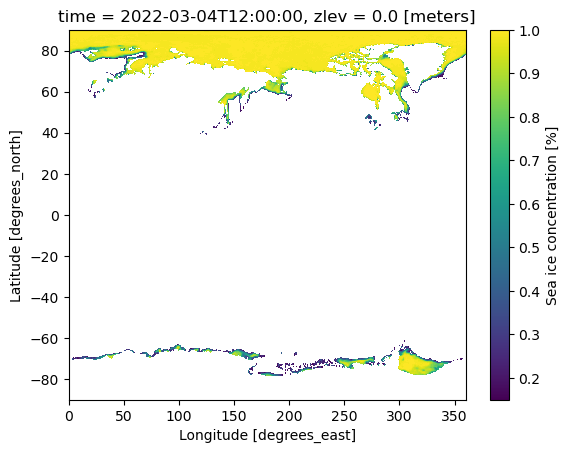

In [45]:
#Let's try plotting this.
ds_sst.ice.plot()

WOAH, sort of a sick plot. But it's still A LOT for one plot, and it is quite spread out.

Looking back at our data, we can see there are 1036800 values in our DataArray -- let's `slice` it down.

Any regions we want to try to look at?

In [46]:
# Slicing
ds_sst.ice.sel(lat = slice(76,82), lon = slice(0,6))

<xarray.DataArray 'ice' (time: 1, zlev: 1, lat: 24, lon: 24)> Size: 2kB
[576 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * zlev     (zlev) float32 4B 0.0
  * lat      (lat) float32 96B 76.12 76.38 76.62 76.88 ... 81.38 81.62 81.88
  * lon      (lon) float32 96B 0.125 0.375 0.625 0.875 ... 5.375 5.625 5.875
Attributes:
    long_name:  Sea ice concentration
    units:      %
    valid_min:  0
    valid_max:  100

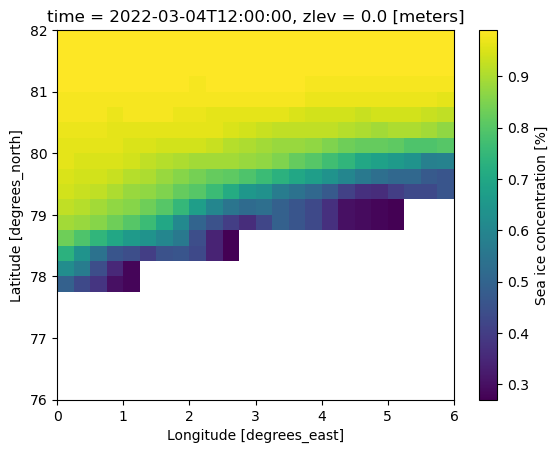

In [47]:
# And plot it!
ds_sst.ice.sel(lat = slice(76,82), lon = slice(0,6)).plot()

If we had more values in more dimensions, we can specify variables for multiple plots in rows and columns. It is not necessary here (but it may be in a practice problem), but I will provide you the syntax for it. 
```
dataarray_name.plot(x = 'x axis label', y = 'y axis label', col = 'column variable', row = 'row variable')
```

If you want a surface plot, use `.plot.surface()`, and if you want a line plot, use `.plot.line()`. Checkout the website I linked at the top to view more plot commands!

# 🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️ **Practice Time** 🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️

# 🏁 Wrap-up: Think, Pair, Share!
## Think!
Take 4 minutes and review on your own what you learned, and write a summary. This can be in paragraph style, bullet points, drawings, whatever makes sense to you. Feel free to create a cell below (either a Markdown or a Code cell) and play around!
## Pair!
Take 4 minutes and discuss at your tables what you all learned today.
## Share!
:::{admonition} Riley's Version
:class: note, dropdown
I will provide you an xarray summary handout next class! We are going to continue to build off of this. 

### 🎊YAYYYY - fifth coding lesson is complete!
Enjoy your day off tomorrow! <br>
<br> 🇩🇪Prost und Guten Tag!
<br> 🇪🇸¡Saludos y Buen Día!
<br> 🇵🇹Felicidades e bom dia!
<br> 🇬🇧Cheers and Good Day!

:::{admonition} **1** Answers
:class: dropdown
1. a_pressure.shape
2. (2,2)

:::{admonition} **2** Answers
:class: dropdown
1. `wind_speed.dims`
2. `wind_speed.coords`
3. `print(wind_speed.max())` and `print(wind_speed.min())`

:::{admonition} **3** Answers 
:class: dropdown
c

:::{admonition} **4** Answers
:class: dropdown
1. `a_sst.isel(latitude=2, longitude=1)`
2. `a_sst.sel(latitude=38, longitude=-21)`
3. `a_sst.isel(latitude=2).sel(longitude=-21)`

:::{admonition} **5** Answers
:class: dropdown
1. This is a `Dataset`
2. It has 4 dimensions - time, zlev (elevation), lat, lon.
3. Time = 1, zlev = 1, lat = 720, lon = 1440
4. 4 variables - sst, anom, err, ice